<a href="https://colab.research.google.com/github/Aanisha/ML-experiments/blob/main/SVD_for_image_compression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!wget "https://upload.wikimedia.org/wikipedia/commons/thumb/4/4c/ChowChow2Szczecin.jpg/1280px-ChowChow2Szczecin.jpg"

--2021-04-28 15:15:51--  https://upload.wikimedia.org/wikipedia/commons/thumb/4/4c/ChowChow2Szczecin.jpg/1280px-ChowChow2Szczecin.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 208.80.153.240, 2620:0:860:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|208.80.153.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 427310 (417K) [image/jpeg]
Saving to: ‘1280px-ChowChow2Szczecin.jpg’

1280px-ChowChow2Szc 100%[===================>] 417.29K  --.-KB/s    in 0.1s    

2021-04-28 15:15:52 (3.42 MB/s) - ‘1280px-ChowChow2Szczecin.jpg’ saved [427310/427310]



In [4]:
import matplotlib.pyplot as plt
import numpy as np

img = plt.imread("/content/1280px-ChowChow2Szczecin.jpg")

In [5]:
img_gr = np.mean(img,-1)

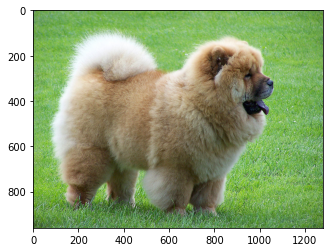

In [6]:
plt.imshow(img)

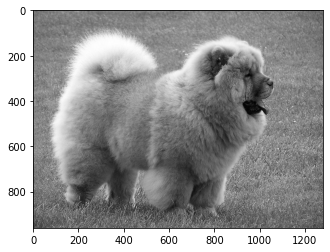

In [8]:
plt.imshow(img_gr,cmap='gray',vmin=0,vmax=255)

In [11]:
U,S,V = np.linalg.svd(img_gr,full_matrices=False)
S = np.diag(S)

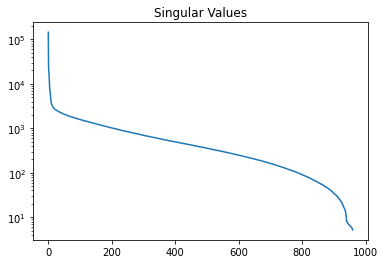

In [14]:
plt.figure(1)
plt.semilogy(np.diag(S))
plt.title('Singular Values')
plt.show()

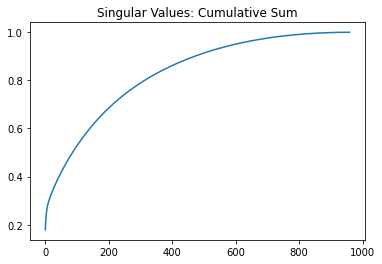

In [13]:
plt.figure(2)
plt.plot(np.cumsum(np.diag(S))/np.sum(np.diag(S)))
plt.title('Singular Values: Cumulative Sum')
plt.show()

In [15]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

def f(x):

   im = U[:,:x] @ S[0:x,:x] @ V[:x,:]
   plt.imshow(256-im,cmap='gray',vmin=0,vmax=255)
   plt.title('r =' + str(x))
   plt.show()
    
interact(f, x=widgets.IntSlider(min=10, max=800, step=1, value=50));

interactive(children=(IntSlider(value=50, description='x', max=800, min=10), Output()), _dom_classes=('widget-…